# Data preprocessing 

In [28]:
from sklearn import preprocessing
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer

In [18]:
origin_data = pd.read_csv("data.csv")
data = origin_data.copy()
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90.0,42.0,43.0,20.879744,82.002744,6.502985,202.935536,rice
1,85.0,58.0,41.0,21.770462,80.319644,7.038096,226.655537,rice
2,60.0,55.0,44.0,23.004459,82.320763,7.840207,263.964248,rice
3,74.0,35.0,40.0,26.491096,80.158363,6.980401,242.864034,rice
4,78.0,42.0,42.0,20.130175,81.604873,7.628473,262.717340,rice


## Handling missing values

In [19]:
data.isnull().sum()

N               2
P               9
K               2
temperature    10
humidity       21
ph              8
rainfall        3
label           0
dtype: int64

<AxesSubplot: title={'center': 'The percentage of missing values'}, ylabel='percentage'>

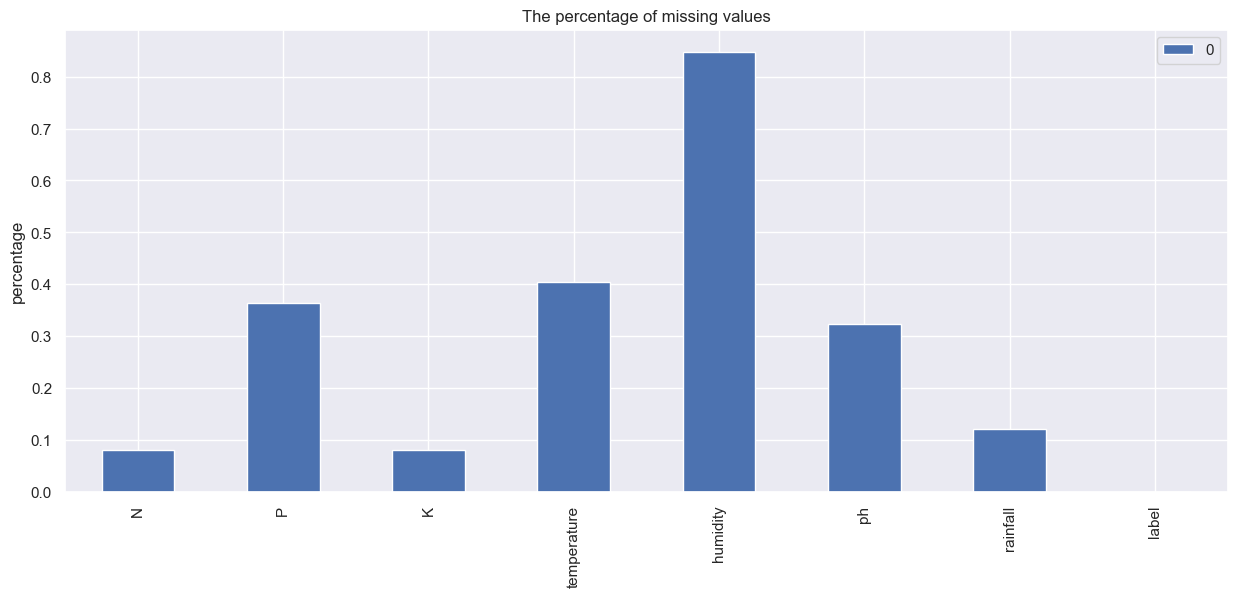

In [25]:
sns.set()
missing_values = pd.DataFrame(data.isnull().sum() / len(data) * 100)
missing_values.plot(kind='bar',title='The percentage of missing values',ylabel='percentage',figsize=(15,6))

In [30]:
#complete missing values with the mean value
dataTemp = data.drop(columns=["label"])

for column in dataTemp.columns : 
    imp = SimpleImputer(strategy='mean')
    data[column] = imp.fit_transform(data[[column]])

In [31]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64